In [1]:
## Import packages
## We need to add the module path to our system path so 
## so that our notebook can find our local objects and code:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
     
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from math import exp
import seaborn as sns
import sys
import glob
from dateutil.relativedelta import *
from numpy.random import exponential, uniform
import scipy.stats as st
from statistics import mean

# Import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import StaticCrop
from farm import CropModel
from farm.functions import *
from farm.climate import make_climate_parameters, check_exponential, Climate

# Set background color
# plot.rc['figure.facecolor'] = 'white'
# plot.rc.axesfacecolor = 'white'

from exponential_model.functions import *

In [2]:
output0 = pd.read_csv(r'..\output\ryoko_debug\test.csv')
output = output0[['kc', 'LAI', 'stress', 'R', 's', 'I', 'E', 'ET', 'T', 'L']]

g:\Araki\maize-Toff\exponential_model\functions.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropmodel_output['sm_for_dS_calc'] = cropmodel_output['s'].ffill()
g:\Araki\maize-Toff\exponential_model\functions.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropmodel_output['dS'] = cropmodel_output['sm_for_dS_calc'].bfill(limit=5).diff().where(cropmodel_output['sm_for_dS_calc'].notnull().shift(periods=+1))
g:\Araki\maize-Toff\exponential_model\functions.py:35: SettingWithCopyWarning: 
A value is 

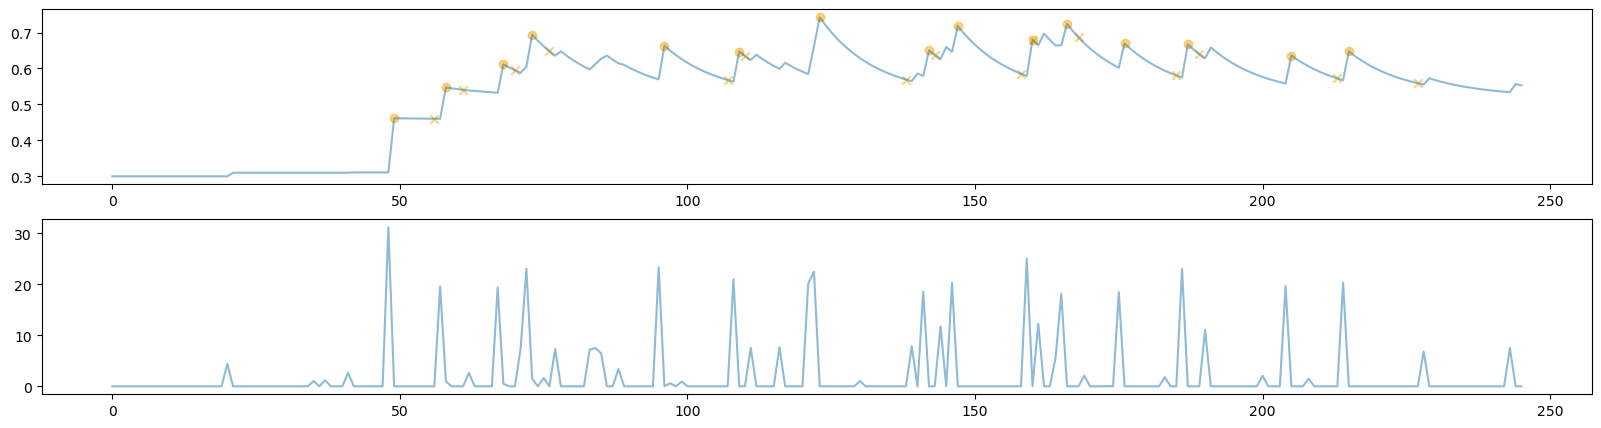

In [3]:
### Define thresholds ###
precip_thresh = 2
# Any positive increment smaller than 5% of the observed range of soil moisture at the site is excluded if it would otherwise truncate a drydown. 
dSdt_noise_thresh = 0.01 #(cropmodel_output.s.max() - cropmodel_output.s.min()) * 0.05
# To avoid noise creating spurious drydowns, identified drydowns were excluded from the analysis when the positive increment preceding the drydown was less than two times the target unbiased root-mean-square difference for SMAP observations (0.08).
dSdt_positive_thresh = 0
###########################

drydown_events = calc_dSdt(cropmodel_output=output, precip_thresh=precip_thresh, dSdt_positive_thresh=dSdt_positive_thresh, dSdt_noise_thresh=dSdt_noise_thresh)

min_s = output.s.min()
drydown_params = []

for i, event in drydown_events.iterrows():
    fit_param = fit_exp_model(event, min_sm_values_at_the_pt=min_s)
    drydown_params.append(fit_param)

df_drydown_params = pd.DataFrame(drydown_params)


In [6]:
output.iloc[140:160]

,kc,LAI,stress,R,s,I,E,ET,T,L,sm_for_dS_calc,dS,dt,dSdt,event_start,event_end
140,1.0,2.5,0.602920,0.000000,0.585880,0.0,0.284836,1.178920,0.894084,0.0,0.585880,0.021309,1.0,-0.006192,False,False
141,1.0,2.5,0.641996,18.571983,0.579688,2.5,0.508458,2.654060,2.145602,0.0,0.579688,-0.006192,1.0,0.070472,False,False
142,1.0,2.5,0.269732,0.000000,0.650161,0.0,0.465533,2.388104,1.922571,0.0,0.650161,0.070472,1.0,-0.012543,False,False
143,1.0,2.5,0.324361,0.000000,0.637618,0.0,0.428002,2.149892,1.721890,0.0,0.637618,-0.012543,1.0,-0.011291,False,False
144,1.0,2.5,0.377848,11.773741,0.626327,2.5,0.542999,2.863532,2.320533,0.0,0.626327,-0.011291,1.0,0.033667,False,False
145,1.0,2.5,0.230424,0.000000,0.659994,0.0,0.495682,2.575582,2.079900,0.0,0.659994,0.033667,1.0,-0.013527,False,False
146,1.0,2.5,0.285299,20.294150,0.646467,2.5,0.762908,4.121679,3.358771,0.0,0.646467,-0.013527,1.0,0.071809,False,False
147,1.0,2.5,0.060958,0.000000,0.718276,0.0,0.686800,3.699212,3.012412,0.0,0.718276,0.071809,1.0,-0.019429,False,False
148,1.0,2.5,0.105373,0.000000,0.698847,0.0,0.620801,3.322355,2.701554,0.0,0.698847,-0.019429,1.0,-0.017449,False,False
149,1.0,2.5,0.155558,0.000000,0.681398,0.0,0.563451,2.985815,2.422364,0.0,0.681398,-0.017449,1.0,-0.015682,False,False
